In [11]:
import argparse
from utils import ModelConfiguration, DataLoaderConfiguration, EXTRA_TRANSFORM
import os
from roar_experiment import experiment
from sensitive_transparency import sensitive_transparency
import torch
from pixel_perturbation_imagenet import create_folder, pixel_pertubation
import math
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from plot_results_pixel_perturbation import pixel_perburtation_results

torch.manual_seed(0)
PATH = os.getcwd() + '/'
device = torch.device('cuda:0')
save_path = PATH + 'results/'

## Extra experiment

This experiment shows the results gained from the extra experiment. We see that the correctly classified images show red spots at places that we think are important to. Except for the woman with darker skin, There the model classified it as an object, but did not look at the face of the woman. This is evidence for the neural net did not base it classification on the face itself.


Male, lighter, accuracy : 0.7772020725388601
Male, darker, accuracy : 0.6320754716981132
Female, lighter, accuracy : 0.8576271186440678
Female, darker, accuracy : 0.7416974169741697


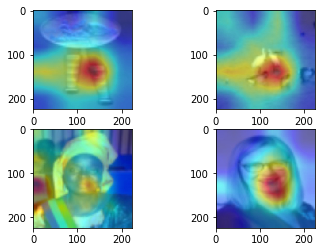

In [14]:
model_config = ModelConfiguration(epochs=10, learning_rate=0.1, checkpoint_path=PATH + 'saved-models/', device=device, model_name='RESNET-50', experiment='extra', num_classes=2)
if not os.path.exists('dataset/extra_experiment/'):
    print('dataset does not exist and needs to be downloaded!')
else:
    loader_config = DataLoaderConfiguration(datasetname='extra_experiment', batch_size=100, path=PATH, transform=EXTRA_TRANSFORM)

    sensitive_transparency(model_config, loader_config)

fix_shape = math.ceil(math.sqrt(len(os.listdir(save_path))))
fig=plt.figure()

for i, name in enumerate(os.listdir(save_path)):
    image = mpimg.imread(save_path + '/' + name)
    fig.add_subplot(fix_shape, fix_shape, i+1)
    plt.imshow(image)
plt.show()

## Pixel Pertubation
This is the pixel pertubation experiment. Here we removed the k% least salient pixels and measured both the AFOC and KL-divergence value. Please note that the results shown are plotted using the function pixel_perturbation_results() while the actual results were realised using the file "pixel_perturbation_imagenet.py" where we saved the results intermediately. 

For both AFOC and KL-divergence a lower value implies that the model performed better since removing the least salient pixels should result in the least change. We can see that FullGrad outperforms the other two approaches thus we can conclude that the FullGrad approach works as we had expected.


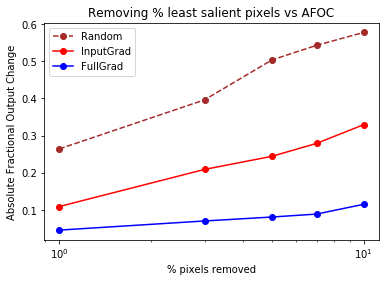

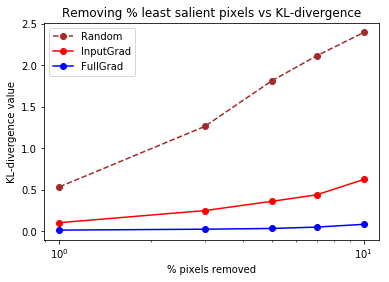

In [3]:
pixel_perburtation_results()

## ROAR
This is the ROAR experiment. A lower accuracy is good while we remove the k% most salient pixels. Since we remove the most important pixels we expect that the best method should have the lowest accuracy. This is not the case as the random approach even performs best at 90% pixel removal. This could be due to numerous reasons which will be elaborated on in our paper.

total_batches: 78 | total loss: 2.257 | epoch Acc: 55.390
total_batches: 78 | total loss: 1.992 | epoch Acc: 52.650
total_batches: 78 | total loss: 2.032 | epoch Acc: 49.620
total_batches: 78 | total loss: 1.869 | epoch Acc: 45.810
total_batches: 78 | total loss: 1.944 | epoch Acc: 36.620
total_batches: 78 | total loss: 1.653 | epoch Acc: 56.710
total_batches: 78 | total loss: 1.426 | epoch Acc: 53.600
total_batches: 78 | total loss: 1.450 | epoch Acc: 50.570
total_batches: 78 | total loss: 1.590 | epoch Acc: 46.920
total_batches: 78 | total loss: 1.978 | epoch Acc: 37.080
total_batches: 78 | total loss: 1.265 | epoch Acc: 56.840
total_batches: 78 | total loss: 1.439 | epoch Acc: 52.940
total_batches: 78 | total loss: 1.568 | epoch Acc: 51.080
total_batches: 78 | total loss: 1.539 | epoch Acc: 46.160
total_batches: 78 | total loss: 1.829 | epoch Acc: 34.910


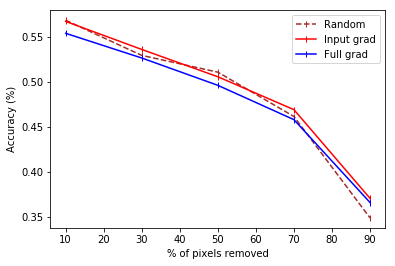

In [4]:
model_config = ModelConfiguration(epochs=80, learning_rate=0.01, device=device, checkpoint_path=PATH + 'saved-models/')
loader_config = DataLoaderConfiguration(path=PATH, data_dir='dataset/')
acc_list = experiment(model_config, loader_config)

x = [10, 30, 50, 70, 90]

plt.plot(x, acc_list[2], "--", marker = "|", c="brown",label = "Random")
plt.plot(x, acc_list[1], marker = "|", c="r", label = "Input grad")
plt.plot(x, acc_list[0], marker = "|", c="b", label = "Full grad")
plt.xlabel('% of pixels removed')
plt.ylabel('Accuracy (%)')
plt.legend()
plt.show()